In [9]:
!pip3 install seaborn

     |████████████████████████████████| 292 kB 1.7 MB/s            
     |████████████████████████████████| 7.3 MB 3.8 MB/s            
     |████████████████████████████████| 3.0 MB 4.3 MB/s            
     |████████████████████████████████| 61 kB 1.2 MB/s             
     |████████████████████████████████| 880 kB 6.9 MB/s            


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string

In [3]:
twitter_df = pd.read_csv("data/clean/git_twitter.csv", index_col = "Unnamed: 0")
reddit_df = pd.read_csv("data/clean/reddit.csv", index_col = "Unnamed: 0")
reddit_df = reddit_df.dropna()

In [7]:
twitter_df.Data[31959]

'listening to sad songs on a monday morning otw to work is sad'

/Users/Muthukrishna/Desktop/NLP-Project/hsd_venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Class')

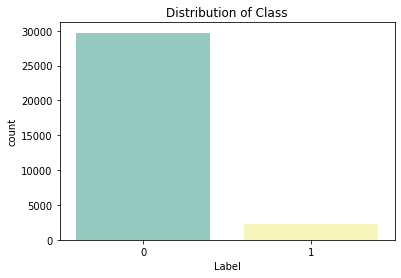

In [12]:
sns.countplot(twitter_df['Label'], palette='Set3').set_title('Distribution of Class')

In [14]:
twitter_df['Label'].value_counts()

0    29720
1     2242
Name: Label, dtype: int64

In [16]:
temp_df = pd.read_csv("data/github_twitter/train.csv", index_col = "Unnamed: 0")

In [19]:
# function to clean all data
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # make text lowercase
    text = text.lower()
    # removing text within brackets
    text = re.sub('\[.*?\]', '', text)
    # removing text within parentheses
    text = re.sub('\(.*?\)', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # removing &amp;
    text = re.sub('(\&amp\;)', '', text)
    # removing any usernames
    text = re.sub('(@[^\s]+)', '', text)
    # removing any hashtags
    text = re.sub('(#[^\s]+)', '', text)
    # remove `rt` for retweet
    text = re.sub('(rt)', '', text)
    # string.punctuation is a string of all punctuation marks
    # so this gets rid of all punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # getting rid of `httptco`
    text = re.sub('(httptco)', '', text)

    return text

cleantweet = lambda x: clean_text_round1(x)

In [26]:
twitter_df['clean_data'] = twitter_df['Data'].apply(cleantweet)

In [27]:
twitter_df

,Label,Data,clean_data
0,0,@user when a father is dysfunctional and is so...,when a father is dysfunctional and is so self...
1,0,@user @user thanks for #lyft credit i cant use...,thanks for credit i cant use cause they don...
2,0,birthday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,0,factsguide: society now #motivation,factsguide society now
...,...,...,...
31957,0,ate @user isz that youuu,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to w...,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",vandalised in in condemns act


## Tokenizing and removing stop words

In [30]:
X = twitter_df['clean_data']
Y = twitter_df['Label']

In [32]:
from nltk.corpus import stopwords

In [33]:
# setting NLTK stop words as `stop_words`
stop_words = set(stopwords.words('english'))

In [35]:
def process_tweet(text):
    """tokenize text in each column and remove stop words"""
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Muthukrishna/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
processed_data = list(map(process_tweet, X))

In [44]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

22207

In [46]:
from nltk.probability import FreqDist

In [48]:
# morphing `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(200)

[('day', 2026),
 ('happy', 1575),
 ('love', 1205),
 ('im', 1148),
 ('u', 1137),
 ('time', 1084),
 ('like', 973),
 ('today', 939),
 ('new', 917),
 ('get', 915),
 ('cant', 808),
 ('people', 803),
 ('good', 790),
 ('one', 774),
 ('see', 753),
 ('dont', 729),
 ('life', 712),
 ('go', 649),
 ('want', 647),
 ('take', 615),
 ('fathers', 595),
 ('bihday', 584),
 ('got', 574),
 ('make', 533),
 ('need', 507),
 ('bull', 504),
 ('way', 504),
 ('going', 488),
 ('great', 484),
 ('us', 475),
 ('days', 475),
 ('best', 474),
 ('first', 468),
 ('work', 468),
 ('really', 462),
 ('wait', 462),
 ('thankful', 456),
 ('ur', 454),
 ('back', 442),
 ('know', 430),
 ('tomorrow', 419),
 ('never', 408),
 ('week', 408),
 ('think', 395),
 ('morning', 387),
 ('world', 381),
 ('feel', 374),
 ('much', 369),
 ('right', 365),
 ('well', 364),
 ('sad', 349),
 ('youre', 340),
 ('even', 337),
 ('always', 334),
 ('last', 332),
 ('night', 329),
 ('weekend', 329),
 ('come', 329),
 ('next', 324),
 ('still', 322),
 ('finally', 319

In [51]:
twitter = pd.read_csv("/Users/Muthukrishna/Desktop/labeled_data.csv", index_col = "Unnamed: 0")

In [52]:
twitter

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [53]:
twitter['label'] = twitter['class'].replace(1, 2)

In [54]:
twitter['label'] = twitter['class'].replace(0, 1)
twitter['label'] = twitter['class'].replace(2, 0)

In [55]:
twitter['clean_tweets'] = twitter['tweet'].apply(cleantweet)

In [56]:
clean_twitter = twitter[['clean_tweets', 'label']].copy()

In [57]:
data = clean_twitter['clean_tweets']
target = clean_twitter['label']

### Before Removing Stop Words

In [58]:
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens

In [59]:
unfilterd_data = list(map(unfiltered_tokens, data))

In [60]:
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]

In [61]:
# getting frequency distribution
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
# top 20 words in the corpus
dirty_corpus_freqdist.most_common(20)

[('a', 9476),
 ('bitch', 8227),
 ('i', 7538),
 ('the', 7168),
 ('you', 6120),
 ('to', 5332),
 ('and', 3951),
 ('my', 3579),
 ('that', 3528),
 ('bitches', 3083),
 ('in', 3051),
 ('is', 2909),
 ('like', 2766),
 ('me', 2764),
 ('of', 2544),
 ('on', 2518),
 ('be', 2375),
 ('hoes', 2368),
 ('this', 2149),
 ('for', 2119)]

## Removing Stop Words

In [62]:
stop_words = set(stopwords.words('english'))
processed_data = list(map(process_tweet, data))
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

20277

In [63]:
# morphing `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('bitch', 8227),
 ('bitches', 3083),
 ('like', 2766),
 ('hoes', 2368),
 ('pussy', 2099),
 ('im', 2061),
 ('hoe', 1906),
 ('dont', 1749),
 ('got', 1597),
 ('ass', 1570),
 ('get', 1428),
 ('fuck', 1411),
 ('u', 1280),
 ('shit', 1262),
 ('nigga', 1198),
 ('aint', 1158),
 ('trash', 1142),
 ('lol', 1074),
 ('know', 806),
 ('niggas', 791)]

### Lemmatization

In [67]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Muthukrishna/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [68]:
from nltk.stem import WordNetLemmatizer 

In [69]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [70]:
X_lem = lemmatized_output
y_lem = target

In [73]:
!pip install imblearn

     |████████████████████████████████| 189 kB 5.2 MB/s            


In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn import metrics, utils, model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=15)

### TF-IDF Vectorization

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [79]:
# instantiating tf_idf vectorizer
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [80]:
# transforming tokenized data into sparse matrix format with 20K stored elements
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [81]:
# taking a quick look at the non zero elements
non_zero_cols = X_train_tfidf.nnz / float(X_train_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))
percent_sparse = 1 - (non_zero_cols / float(X_train_tfidf.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 13.364420457984465
Percentage of columns containing ZERO: 0.9998720483637183


In [82]:
log_reg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)
# class_weight='balanced' actually didn't impact the score

In [83]:
%%time
log_reg_baseline.fit(X_train_tfidf, y_train)
log_reg_test_preds = log_reg_baseline.predict(X_test_tfidf)

CPU times: user 4.18 s, sys: 1.22 s, total: 5.4 s
Wall time: 1.09 s


In [86]:
def evaluation(precision, recall, f1_score, f1_weighted):
    """prints out evaluation metrics for a model"""
    print('Testing Set Evaluation Metrics:')
    print('Precision: {:.4}'.format(precision))
    print('Recall: {:.4}'.format(recall))
    print('F1 Score: {:.4}'.format(f1_score))
    print('Weighted F1 Score: {:.4}'.format(f1_weighted))

In [87]:
log_reg_precision = precision_score(y_test, log_reg_test_preds)
log_reg_recall = recall_score(y_test, log_reg_test_preds)
log_reg_f1_score = f1_score(y_test, log_reg_test_preds)
log_reg_f1_weighted = f1_score(y_test, log_reg_test_preds, average='weighted')

# printing scores
evaluation(log_reg_precision, log_reg_recall, log_reg_f1_score, log_reg_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.9593
Recall: 0.891
F1 Score: 0.9239
Weighted F1 Score: 0.8899


In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test, log_reg_test_preds)

0.8856163001815615